# hw4 Question 1

### Team Members:
* Nrusimha Vihari Eyunni (neyunni)
* Vishwas Deshai (visdesai)


## 1. Using the MNIST dataset, perform K means by choosing the appropriate k value

In [56]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# visualization
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams


import sys
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline
rcParams['figure.figsize'] = [9, 7]
plt.style.use('fivethirtyeight')

print('Python: {}'.format(sys.version))
print('NumPy: {}'.format(np.version))

Python: 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
NumPy: <module 'numpy.version' from '/usr/local/lib/python3.7/dist-packages/numpy/version.py'>


In [57]:
# if the GPU is available use it otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [58]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [59]:
color = ['green', 'orange', 'red', 'blue', 'crimson', 'sandybrown', 'mediumslateblue', 'purple', 'tomato', 'violet']

In [60]:
train_data = datasets.MNIST('./', train=True, download=True)
test_data = datasets.MNIST('./', train=False, download=True)

train_data_numpy = train_data.data.numpy()
test_data_numpy = test_data.data.numpy()
train_targets_numpy = train_data.targets.numpy()

train_data_numpy = train_data_numpy.reshape((train_data_numpy.shape[0], train_data_numpy.shape[1] * train_data_numpy.shape[2]))

Checking the length of training and testing datasets:

In [61]:
print('-'*50)
display(f"The length of Training dataset is: {len(train_data_numpy)}")
print('-'*50)
display(f"The length of Training dataset is: {len(test_data_numpy)}")
print('-'*50)

--------------------------------------------------


'The length of Training dataset is: 60000'

--------------------------------------------------


'The length of Training dataset is: 10000'

--------------------------------------------------


----------------------------------------
Value: 5
----------------------------------------



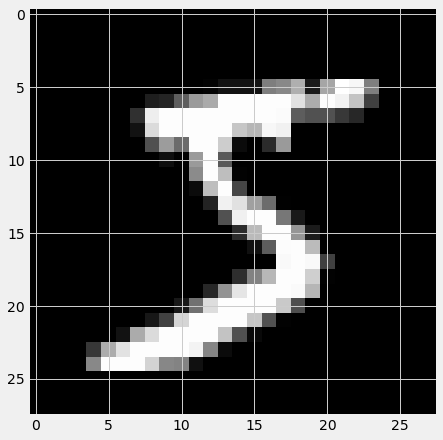

In [62]:
image, label = next(iter(train_data))
plt.imshow(image, cmap = 'gray')
print('-'*40)
print(f"Value: {label}")
print('-'*40)
print()

In [63]:
# tensors = train.train_data.numpy()
# tensors = np.array([t.flatten() for t in tensors])
# # Load Data
# pca = PCA(2)
 
# #Transform the data
# df = pca.fit_transform(tensors)
 
# df.shape

Getting the samples Randomly

In [64]:
import random
from sklearn.decomposition import PCA

sample_indices = random.sample(range(train_data_numpy.shape[0]), k=12000)
sample_train_data_numpy = train_data_numpy[sample_indices]
sample_train_targets_numpy = train_targets_numpy[sample_indices]

In [65]:
sample_train_targets_numpy.shape

(12000,)

In [66]:
sample_train_data_numpy.shape

(12000, 784)

**Doing PCA on the 784 dimensions data to reduce it to 2 for the convenience of K means**

In [67]:
pca = PCA(n_components = 2)
sample_train_data_numpy = pca.fit_transform(X=sample_train_data_numpy)
print("The number of train samples: {}. The dimension of train samples: {}".format(sample_train_data_numpy.shape[0], sample_train_data_numpy.shape[1]))

The number of train samples: 12000. The dimension of train samples: 2


In [68]:
sample_train_data_numpy.shape

(12000, 2)

In [69]:
def findOptimalK():
    distort = list()
    for k in range(1, 35):
        kmeans = KMeans(n_clusters=k)
        kmeans = kmeans.fit(sample_train_data_numpy)
        distort.append(kmeans.inertia_)
        
    return distort

In [70]:
distort = findOptimalK()

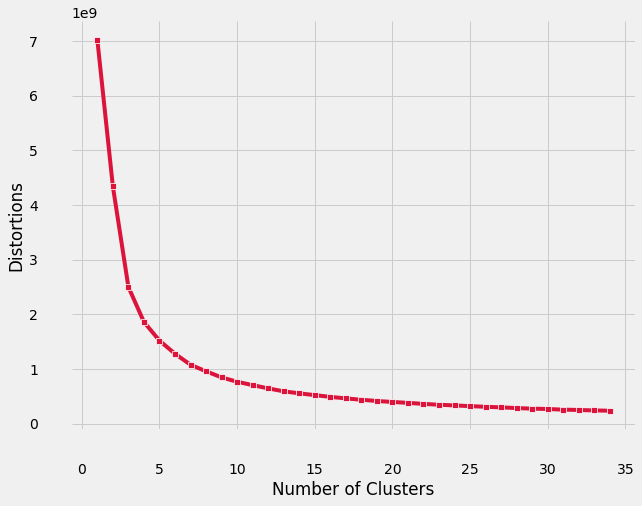

In [72]:
ax = sb.lineplot(range(1, 35), distort, marker = 's', color = color[4])
ax.set(xlabel='Number of Clusters', ylabel='Distortions')
sb.despine(offset=30, trim=True)

In [124]:
#Initialize the class object
kmeansnormal = KMeans(n_clusters=10, init='random', n_init=10, max_iter=300, random_state=0)
#predict the labels of clusters.
labelnormal = kmeansnormal.fit_predict(sample_train_data_numpy)
# Cluster centroids
centroidsnormal = kmeansnormal.cluster_centers_
print("K: {}. The dimension of centroids: {}".format(centroids.shape[0], centroids.shape[1]))
print(labelnormal)
print(centroidsnormal.shape)
print(kmeansnormal.labels_)

K: 10. The dimension of centroids: 2
[3 2 8 ... 7 2 2]
(10, 2)
[3 2 8 ... 7 2 2]


**Choosing the appropriate K**

Based on the above figure, the best K is somewhere between 5 and 10 while using elbow method. However, looking at the dataset, we know that we need 10 clusters as there are only 0-9 (10) possible outcomes for the data. Hence, I am choosing K = 10.

## 2. Displaying the Datapoints, clusters and their centroids. 

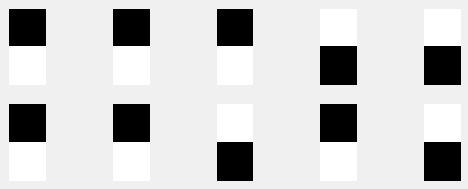

In [84]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 2, 1)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Since its a highly pixelated data, we are not able to figure out the digits just yet. Maybe we can after we try out different initialization methods.

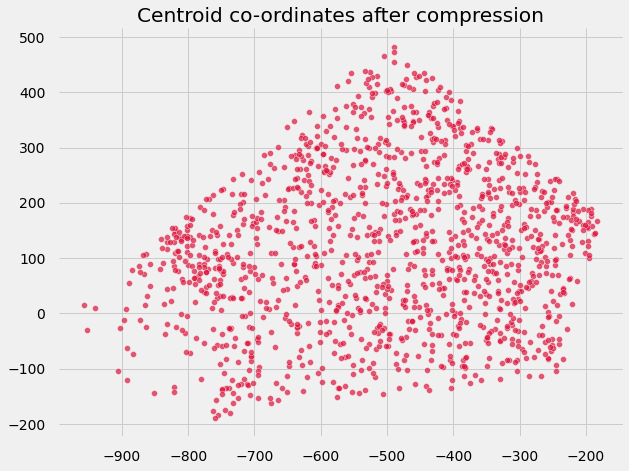

In [85]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = sample_train_data_numpy[labelnormal == 0]
 
#plotting the results
ax = sb.scatterplot(filtered_label0[:,0], filtered_label0[:,1], color = color[4], alpha=0.7, marker = 'o')
ax.set_title('Centroid co-ordinates after compression')
sb.despine(offset=10, trim=True)

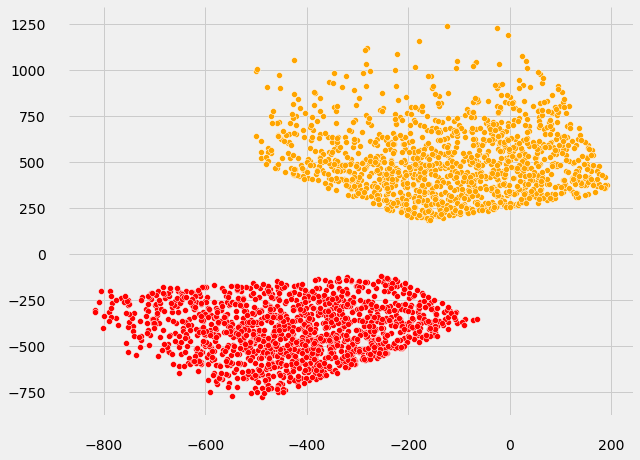

In [86]:
#filter rows of original data
filtered_label2 = sample_train_data_numpy[labelnormal == 2]
 
filtered_label8 = sample_train_data_numpy[labelnormal == 8]
 
#Plotting the results
ax = sb.scatterplot(filtered_label2[:,0], filtered_label2[:,1], color=color[1])
ax = sb.scatterplot(filtered_label8[:,0], filtered_label8[:,1], color=color[2])
sb.despine(offset=20, trim=True)

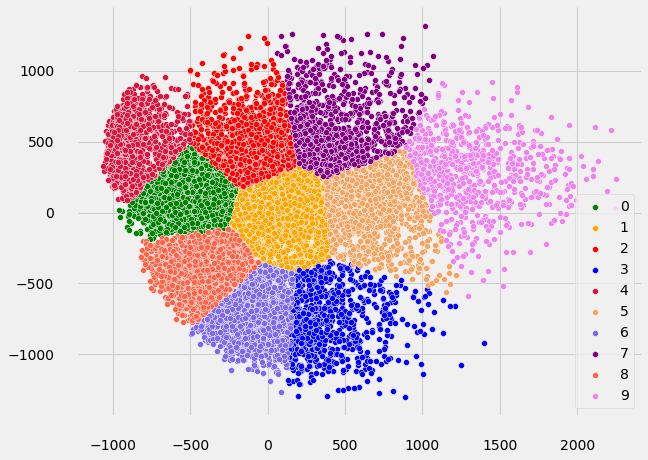

In [93]:
#Getting unique labels
 
u_labels = np.unique(labelnormal)
 
#plotting the results:
 
for i in u_labels:
  ax = sb.scatterplot(sample_train_data_numpy[labelnormal == i, 0], sample_train_data_numpy[labelnormal == i, 1], label=i, color=color[i])

sb.despine(offset=20, trim=True)

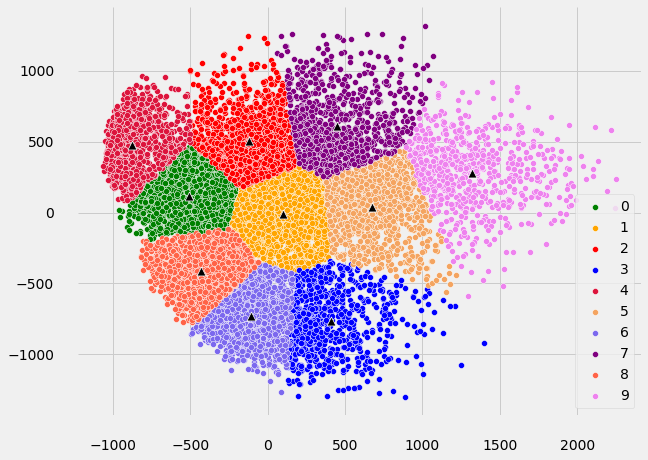

In [88]:
for i in u_labels:
    ax = sb.scatterplot(sample_train_data_numpy[labelnormal == i , 0] , sample_train_data_numpy[labelnormal == i , 1] , label = i, color=color[i])
ax = sb.scatterplot(centroidsnormal[:,0] , centroidsnormal[:,1] , s = 80, marker='^', color = 'k')
sb.despine(offset=20, trim=True)

In above two figures, the triangles are the centroids. The centorids in outer range of the scatters and the inner range of scatters, all match perfectly to their respective clusters. I believe, this is because of the PCA components that we have taken. We see that the clusters are formed perfectly with K = 10 and n_components = 2. However, upon trying with various n_Components parameter and different values of K, I observed that the clusters do not converge this perfectly. Therefore, K= 10 and n_components= 2 are the best parameters that can be chosen. Coming to the centroids, they too have not fared well with other parameters. But looking at the above figure, we can say that they have converged properly with their respective clusters and hopefully which means they show their respective labels. This cannot be confirmed without taking an accuracy test.


## 3. K Means ++ 

In [94]:
def findOptimalK():
    errorvsk = list()
    for k in range(1, 20):
        kmeansplus = KMeans(n_clusters=k, init='k-means++')
        kmeansplus = kmeansplus.fit(sample_train_data_numpy)
        errorvsk.append(kmeansplus.inertia_)
    return errorvsk

In [95]:
distort = findOptimalK()

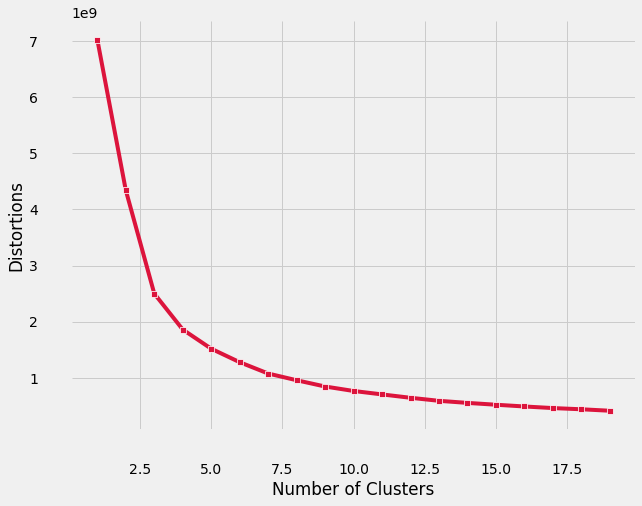

In [96]:
ax = sb.lineplot(range(1, 20), distort, marker = 's', color = color[4])
ax.set(xlabel='Number of Clusters', ylabel='Distortions')
sb.despine(offset=30, trim=True)

In [97]:
#Initialize the class object
kmeansplus = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, random_state=0)
#predict the labels of clusters.
labelplus = kmeansplus.fit_predict(sample_train_data_numpy)
# Cluster centroids
centroidsplus = kmeansplus.cluster_centers_
print("K: {}. The dimension of centroids: {}".format(centroidsplus.shape[0], centroidsplus.shape[1]))
print(labelplus)
print(centroidsplus.shape)
print(kmeansplus.labels_)   

K: 10. The dimension of centroids: 2
[7 8 6 ... 0 8 8]
(10, 2)
[7 8 6 ... 0 8 8]


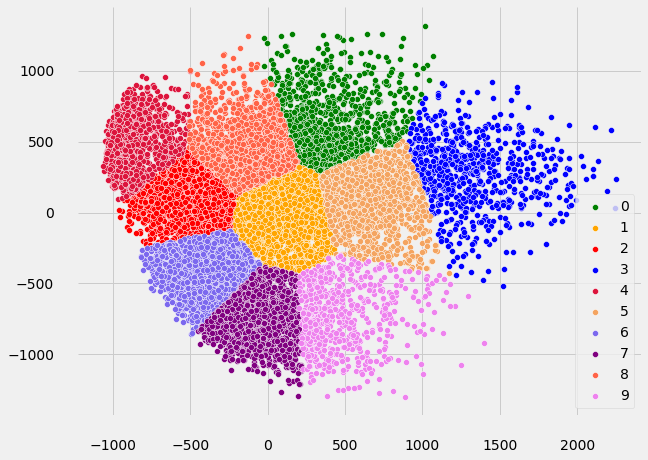

In [99]:
#Getting unique labels
 
u_labelsplus = np.unique(labelplus)
 
#plotting the results:
 
for i in u_labels:
  ax = sb.scatterplot(sample_train_data_numpy[labelplus == i, 0], sample_train_data_numpy[labelplus == i, 1], label=i, color=color[i])

sb.despine(offset=20, trim=True)

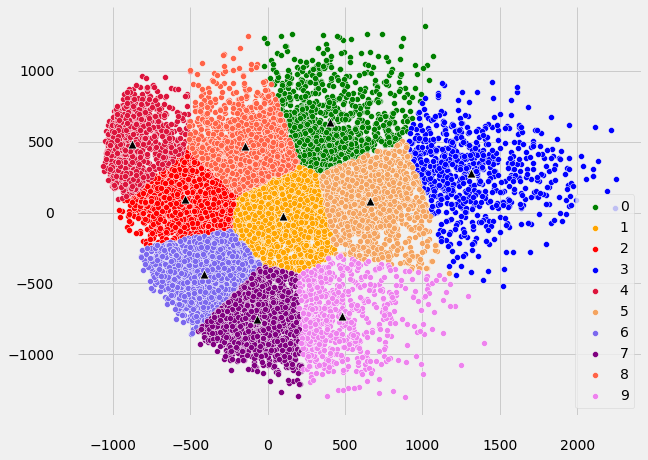

In [100]:
#Getting the Centroids
centroidsplus = kmeansplus.cluster_centers_
u_labelsplus = np.unique(labelplus)
 
#plotting the results:
 
for i in u_labelsplus:
    ax = sb.scatterplot(sample_train_data_numpy[labelplus == i , 0] , sample_train_data_numpy[labelplus == i , 1] , label = i, color=color[i])
ax = sb.scatterplot(centroidsplus[:,0] , centroidsplus[:,1] , s = 80, marker='^', color = 'k')
sb.despine(offset=20, trim=True)

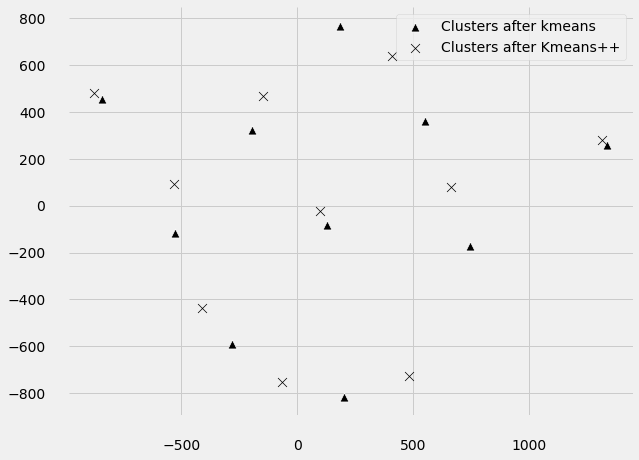

In [121]:
ax = sb.scatterplot(centroids[:,0] , centroids[:,1] , s = 80, marker='^', color = 'k', label = "Clusters after kmeans")
ax = sb.scatterplot(centroidsplus[:,0] , centroidsplus[:,1] , s = 80, marker='x', color = 'k', label = "Clusters after Kmeans++")
sb.despine(offset=20, trim=True)

## 4. Clustering by using Centroids obtained from taking a single sample of the dataset for each cluster.

In [104]:
labelplus

array([7, 8, 6, ..., 0, 8, 8], dtype=int32)

In [105]:
# import random
# import numpy as np
# labels_dict = {}
# for i, label in enumerate(sample_train_targets_numpy):
#   if label not in labels_dict:
#     labels_dict[label] = []
#   labels_dict[label].append(i)

# sampled_label_index = np.zeros((len(labels_dict), sample_train_data_numpy.shape[-1]))
# for j, _label in enumerate(labels_dict.keys()):
#   rand_index = random.sample(labels_dict[_label], k=1)
#   sampled_label_index[j] = sample_train_data_numpy[rand_index]

In [106]:
# from sklearn.cluster import KMeans
# kmeansrand = KMeans(n_clusters=10, init=sampled_label_index, n_init=10, max_iter=300, random_state=0)
# labelrand = kmeansrand.fit_predict(sample_train_data_numpy)

In [107]:
zipped = list(zip(sample_train_data_numpy, sample_train_targets_numpy))
zipped[:10]
import random
random.seed(123)
samples = [random.choice([k for k in zipped if k[1] == i]) for i in range(10)]

In [108]:
samples

[(array([849.93254989, 211.60947692]), 0),
 (array([-884.65046422,  321.46193649]), 1),
 (array([ 12.16827548, -35.47974636]), 2),
 (array([-338.07192921,  635.40932277]), 3),
 (array([-170.65985507, -328.52237493]), 4),
 (array([287.52259867, 421.30938904]), 5),
 (array([400.39021658,  38.14730986]), 6),
 (array([-124.49456245, -556.2883373 ]), 7),
 (array([995.32099434, 459.07378821]), 8),
 (array([ -93.60440767, -737.99806655]), 9)]

In [109]:
samples = np.array([k[0] for k in samples])

In [110]:
samples

array([[ 849.93254989,  211.60947692],
       [-884.65046422,  321.46193649],
       [  12.16827548,  -35.47974636],
       [-338.07192921,  635.40932277],
       [-170.65985507, -328.52237493],
       [ 287.52259867,  421.30938904],
       [ 400.39021658,   38.14730986],
       [-124.49456245, -556.2883373 ],
       [ 995.32099434,  459.07378821],
       [ -93.60440767, -737.99806655]])

In [111]:
#Initialize the class object
kmeansrand = KMeans(n_clusters=10, init=samples, n_init=10, max_iter=300, random_state=0)
 
#predict the labels of clusters.
labelrand = kmeansrand.fit_predict(sample_train_data_numpy)
 
print(labelrand)  

[9 3 7 ... 5 3 3]


In [97]:
# \import random
# random.seed(123)
# samples = [random.choice([k for k in zipped if k[1] == i]) for i in range(10)]
# samples = np.array([k[0] for k in samples])

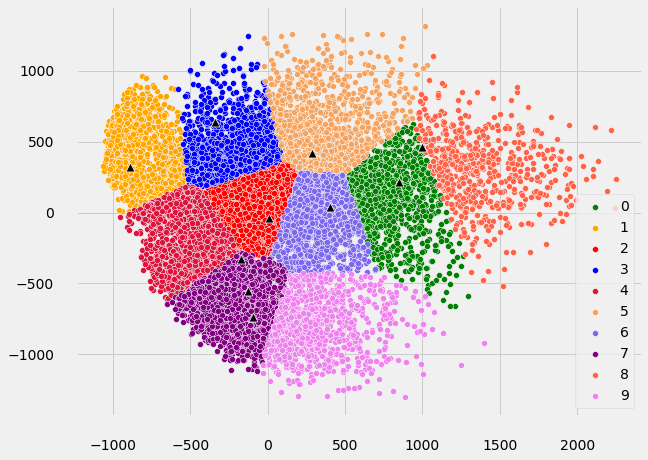

In [112]:
#Getting the Centroids
centroidsrand = kmeansrand.cluster_centers_
u_labelsrand = np.unique(labelrand)
 

#plotting the results with initial clusters:
for i in u_labelsrand:
    ax = sb.scatterplot(sample_train_data_numpy[labelrand == i , 0] , sample_train_data_numpy[labelrand == i , 1] , label = i, color=color[i])
ax = sb.scatterplot(samples[:,0] , samples[:,1] , s = 80, marker='^', color = 'k')
sb.despine(offset=20, trim=True)

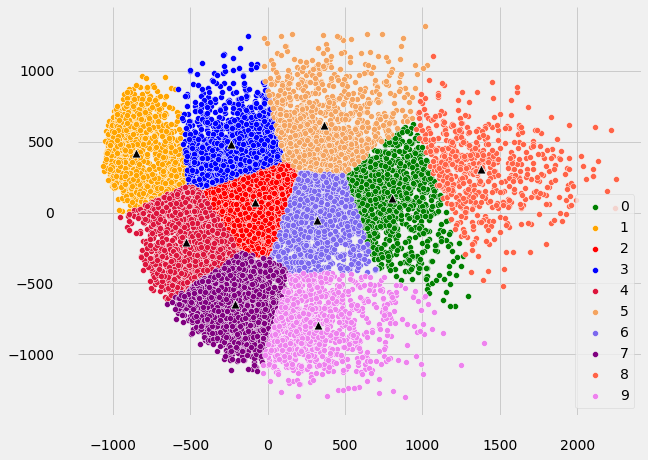

In [113]:
#plotting the results with final clusters:
for i in u_labelsrand:
    ax = sb.scatterplot(sample_train_data_numpy[labelrand == i , 0] , sample_train_data_numpy[labelrand == i , 1] , label = i, color=color[i])
ax = sb.scatterplot(centroidsrand[:,0] , centroidsrand[:,1] , s = 80, marker='^', color = 'k')
sb.despine(offset=20, trim=True)

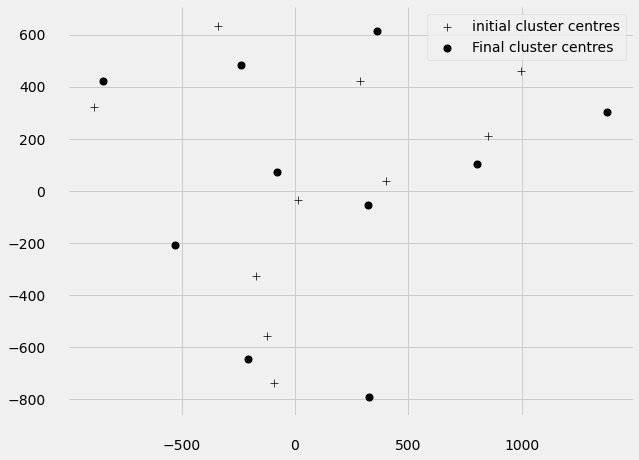

In [123]:
ax = sb.scatterplot(samples[:,0] , samples[:,1] , s = 80, marker='+', color = 'k', label = "initial cluster centres")
ax = sb.scatterplot(centroidsrand[:,0] , centroidsrand[:,1] , s = 80, marker='o', color = 'k', label = "Final cluster centres")
sb.despine(offset=20, trim=True)

#### *Discussion*:
Looking at the comparison between intial Cluster centers and Final cluster centers, we can clearly say that, the initial are as done above, quite correct since they have been obtained from the samples and do represent the labels properly. However, the final cluster centres are much more refined but since Kmeans++ has been performed on them, the centroids are representative of the labels as they are now in their respective clusters. So, they do represent the labels, just less effectively. 

Also, for some centroids, the initial centers are close to the final centers, while some don't. But the for the centers which are not close, they would not go too far away from the initial centers.

## 5. Lets look at all the Cluster Centroids now!

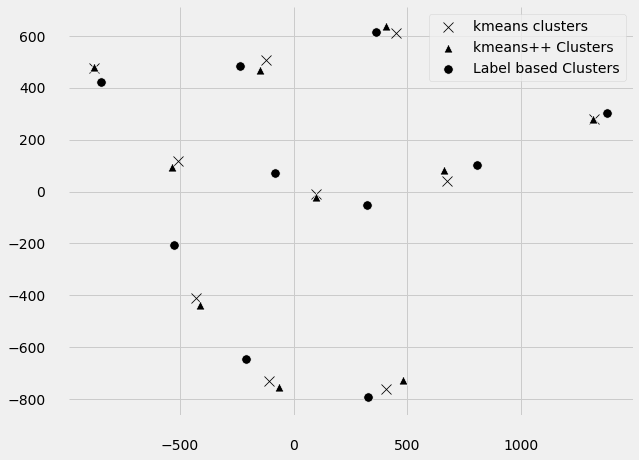

In [120]:
ax = sb.scatterplot(centroidsnormal[:,0] , centroidsnormal[:,1] , s = 100, marker='x', color = 'k', label = "kmeans clusters")
ax = sb.scatterplot(centroidsplus[:,0] , centroidsplus[:,1] , s = 80, marker='^', color = 'k', label = "kmeans++ Clusters")
ax = sb.scatterplot(centroidsrand[:,0] , centroidsrand[:,1] , s = 90, marker='o', color = 'k', label = "Label based Clusters")
sb.despine(offset=20, trim=True)

#### *Discussion*:
Looking at all of the above combined plots, we can see that for the first kmeans, the final centroids seem to be not far away from the initial cluster centres for Kmeans, where as for kmeans ++, they seems to be a slight bit more different and farther from the initial cluster centres. Except for in few places, almost all of the cluster centres for various initializations are quite near to each other. Very very few fall on each other pointing to the same centres. 

## 6. Variance for the above performed three approaches.

In [119]:
import numpy as np
# results1 = kmeans.predict(X=sampled_train_set_array)
# results2 = kmeansplusplus.predict(X=sampled_train_set_array)
# results3 = kmeansrand.predict(X=sampled_train_set_array)
variance1 = 0
for i, label in enumerate(labelnormal):
  variance1 += np.linalg.norm(x=(sample_train_data_numpy[i] - centroidsnormal[label]))
variance2 = 0
for i, label in enumerate(labelplus):
  variance2 += np.linalg.norm(x=(sample_train_data_numpy[i] - centroidsplus[label]))
variance3 = 0
for i, label in enumerate(labelrand):
  variance3 += np.linalg.norm(x=(sample_train_data_numpy[i] - centroidsrand[label]))
print("Variance for Test with random initialization: {}\nVariance for Test with k-means++ initialization: {}\nVariance for Test with labels assumed: {}".format(variance1, variance2, variance3))

Variance for Test with random initialization: 2733448.596724925
Variance for Test with k-means++ initialization: 2735832.142727383
Variance for Test with labels assumed: 2788978.3491200088


#### *Discussion*:

The variance seems to be increasing with the type of initializations. Looking at the above, the variance with random initialization is small when compared to the variance with k-means++ inititalization, in the same way, the variance with k-means++ inititalization is smaller than the variance with labeled sample initialization. The difference is influenced by the differences in the initialization in turn the centroids. As you can see, the centroids are one of the key parts affecting the variance here. The smallest variance has the most random initialization.